In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
img_size=256
batch=32
channel=3
epochs=50

In [3]:
dataset= tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(img_size,img_size),
    batch_size=batch
)

Found 2097 files belonging to 3 classes.


In [4]:
class_names= dataset.class_names

In [5]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
train_size=0.8
len(dataset)*train_size

52.800000000000004

In [7]:
train_ds=dataset.take(53)

In [8]:
test_ds=dataset.skip(54)

In [9]:
val_size=0.1
len(dataset)*val_size

6.6000000000000005

In [10]:
val_ds = test_ds.take(7)

In [11]:
test_ds = test_ds.skip(7)

In [12]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [13]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(img_size,img_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [14]:
data_augmentation= tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [15]:
input_shape=(batch,img_size,img_size,channel)
n_classes=3
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])
model.build(input_shape=input_shape)

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [17]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [18]:
history = model.fit(
    train_ds,
    epochs=epochs,
    batch_size=batch,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
53/53 [==============================] - 205s 3s/step - loss: 0.9269 - accuracy: 0.4581 - val_loss: 0.9114 - val_accuracy: 0.6295
Epoch 2/50
53/53 [==============================] - 148s 3s/step - loss: 0.7221 - accuracy: 0.6798 - val_loss: 0.6843 - val_accuracy: 0.6830
Epoch 3/50
53/53 [==============================] - 146s 3s/step - loss: 0.5027 - accuracy: 0.7842 - val_loss: 0.4710 - val_accuracy: 0.7902
Epoch 4/50
53/53 [==============================] - 149s 3s/step - loss: 0.3217 - accuracy: 0.8797 - val_loss: 0.2721 - val_accuracy: 0.8705
Epoch 5/50
53/53 [==============================] - 181s 3s/step - loss: 0.2203 - accuracy: 0.9133 - val_loss: 0.1106 - val_accuracy: 0.9598
Epoch 6/50
53/53 [==============================] - 183s 3s/step - loss: 0.3054 - accuracy: 0.8856 - val_loss: 0.1983 - val_accuracy: 0.8973
Epoch 7/50
53/53 [==============================] - 194s 4s/step - loss: 0.2637 - accuracy: 0.8974 - val_loss: 0.1378 - val_accuracy: 0.9509
Epoch 8/50
53

In [20]:
scores = model.evaluate(test_ds)

5/5 [==============================] - 2s 400ms/step - loss: 0.4042 - accuracy: 0.8759


In [21]:
scores

[0.4042232632637024, 0.8758620619773865]

In [22]:
history

In [24]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

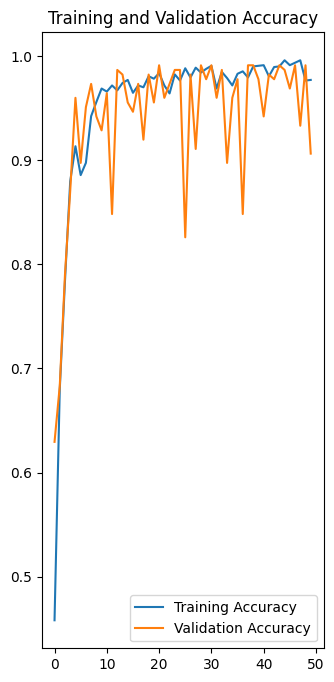

In [25]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(epochs),acc,label='Training Accuracy')
plt.plot(range(epochs),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 1s 890ms/step
predicted label: Potato___Early_blight


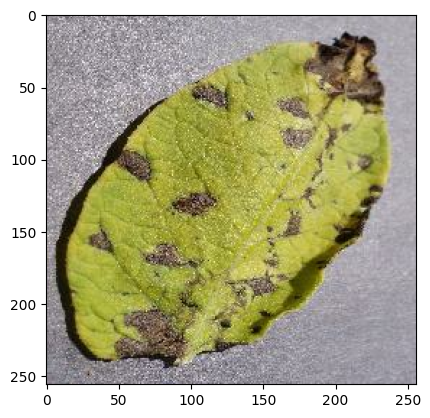

In [26]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [27]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 52ms/step


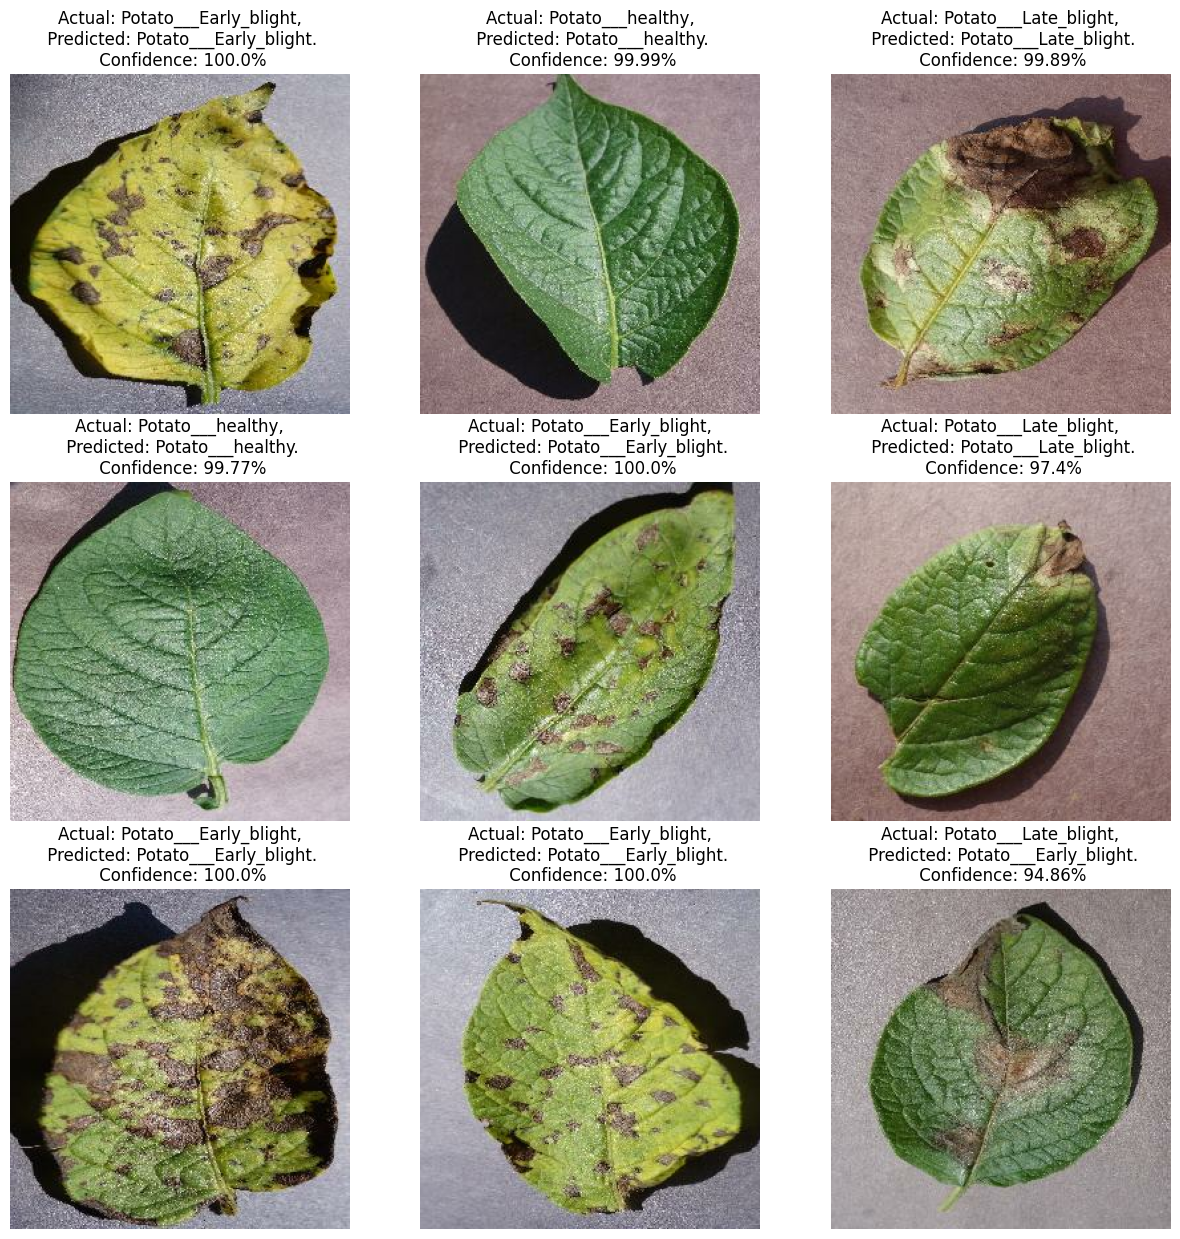

In [28]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [31]:
model_version=1
model.save(f"models/{model_version}")

INFO:tensorflow:Assets written to: models/1\assets


INFO:tensorflow:Assets written to: models/1\assets
